### Imports Usados

In [1420]:
import math
import numpy as np
import matplotlib.pyplot as plt

### Constantes e Condições Iniciais

In [1421]:
k = 2.5
h = 0.2
const = k/h**2
Tbegin = 60
Tend = 40
t0 = 50.0

### Cáculo de N

In [1422]:
N = 1/h -1

# verifica se N pertence aos inteiros
if N != int(N):
    print("N não é inteiro")
else:
    N = int(N)
    print("N = ", N)

N =  4


### Constroi as matrizes utilizadas

In [1423]:
D2 = np.zeros((N, N))
BC = np.zeros(N)

In [1424]:
BC[0] = Tbegin
BC[N-1] = Tend

print('BC = ')
for i in range(N):
    print('|{:.2f}|'.format(BC[i]))

BC = 
|60.00|
|0.00|
|0.00|
|40.00|


In [1425]:
for i in range(N):
    D2[i][i] = -2
    if i > 0:
        D2[i][i-1] = 1
    if i < N-1:
        D2[i][i+1] = 1

print('D2 = ')
print(D2)

D2 = 
[[-2.  1.  0.  0.]
 [ 1. -2.  1.  0.]
 [ 0.  1. -2.  1.]
 [ 0.  0.  1. -2.]]


### Função T'

In [1426]:
def function(t):
    return const * (D2 @ t + BC)

### Método de Euler

In [1427]:
def euler_step(t, step):
    return t + step * function(t)

### Método de Runge Kutta

In [1428]:
def runge_kutta_step(t, step):
    k1 = step * function(t)
    k2 = step * function(t + 0.5 * k1)
    k3 = step * function(t + 0.5 * k2)
    k4 = step * function(t + k3)
    return t + (k1 + 2*k2 + 2*k3 + k4) / 6

### Resolve o Sistema Utilizando os Métodos

In [1429]:
def solver(t, t_end, dt, step_method):
    time_steps = int(t_end/dt) + 2
    T_history = np.zeros((time_steps, N))

    for i in range(time_steps): 
        T_history[i] = t
        t = step_method(t, dt)

    return T_history.T

def solver_with_increment(t, t_end, dt, step_method, time_increment):
    time_steps = int(t_end / dt)
    T_history = np.zeros((time_steps, N))
    
    for i in range(time_steps):
        if i % time_increment == 0:
            BC[0] += 5
        T_history[i] = t
        t = step_method(t, dt)

    return T_history.T

### Escolhendo o passo de tempo

In [1430]:
min_step = 1/max(np.linalg.eig(abs(const*D2))[0])
time_simulation = 0.05

step = min_step
if time_simulation/min_step > 1000:
    print("Quantidade maxima de steps excedidas!")
    step = time_simulation/1000

print("Passo de tempo escolhido:", step)

Passo de tempo escolhido: 0.0044222912360003365


### Plotagem das temperaturas em função do tempo

In [1431]:
def plot_line(array_data, step, special=False):
    plt.figure(figsize=(12, 6))
    counter = 0
    for data in array_data:
        if counter == 0 and special:
            plt.plot([i*step for i in range(len(data))], data, linestyle='--')
        else:
            plt.plot([i*step for i in range(len(data))], data, linestyle='-')
        counter += 1
    plt.ylabel('Temperatura (°C)')
    plt.xlabel('Tempo (s)')
    plt.yticks(array_data.T[len(array_data.T) -1])
    plt.xlim(0, 0.05)
    plt.grid(True)
    plt.show()

### Solução do sistema com os métodos de Euler e Runge Kutta

In [1432]:
result_euler = solver(np.full(N, t0, dtype=float), time_simulation, step, euler_step)
result_runge = solver(np.full(N, t0, dtype=float), time_simulation, step, runge_kutta_step)

result_euler = np.concatenate([np.full((1, result_euler.shape[1]), 60), result_euler, np.full((1, result_euler.shape[1]), 40)], axis=0)
result_runge = np.concatenate([np.full((1, result_runge.shape[1]), 60), result_runge, np.full((1, result_runge.shape[1]), 40)], axis=0)

In [1433]:
def plot_grid(array_data, step):
    # Dados
    temperaturas = array_data.T
    len_y = len(array_data[0])
    len_x = len(temperaturas[0])
    
    # Ajuste dos valores de x para que cada bloco seja simétrico
    x_barra = [i * step for i in range(len_x)]
    
    norm = plt.Normalize(vmin=temperaturas.min(), vmax=temperaturas.max())
    colors = plt.cm.Reds(norm(temperaturas))

    plt.figure(figsize=(12, 12))

    for t in range(len_y - 1):
        for i in range(len_x):
            # Ajustando a posição para preencher ambos os lados do bloco
            x_left = 45*(x_barra[i] - step/2)
            x_right =45*(x_barra[i] + step/2)
            plt.fill_between([x_left, x_right], t * step, (t + 1) * step, color=colors[t, i], alpha=1)

            # Colocando os valores das temperaturas no gráfico
            offset = 0
            if i == 0 or i == len_x -1:
                offset = 0.02
            plt.text(x_barra[i] * 45 + offset, (t + 0.5) * step, f'{temperaturas[t, i]:.1f}',
                     horizontalalignment='center', verticalalignment='center',
                     fontsize=10, color='black')

    # Ajustando os limites dos eixos
    plt.xlim(0, 1)
    plt.ylim(0, (len_y-1) * step)  # Ajustando a altura do gráfico para acomodar o tempo
    #plt.xticks([i * step for i in range(len_x + 1)])
    plt.xlabel('Distância')
    plt.ylabel('Tempo (s)')

    # Exibindo o gráfico
    plt.show()

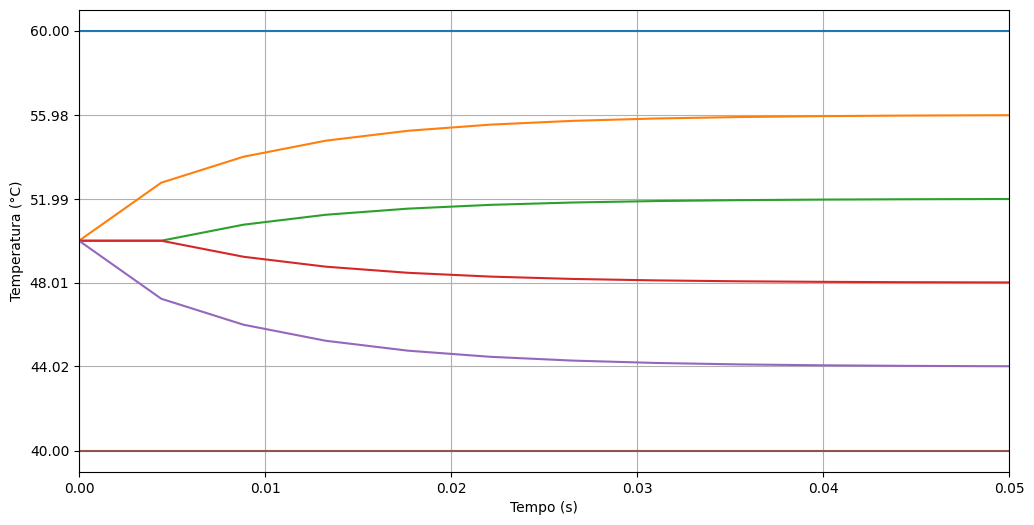

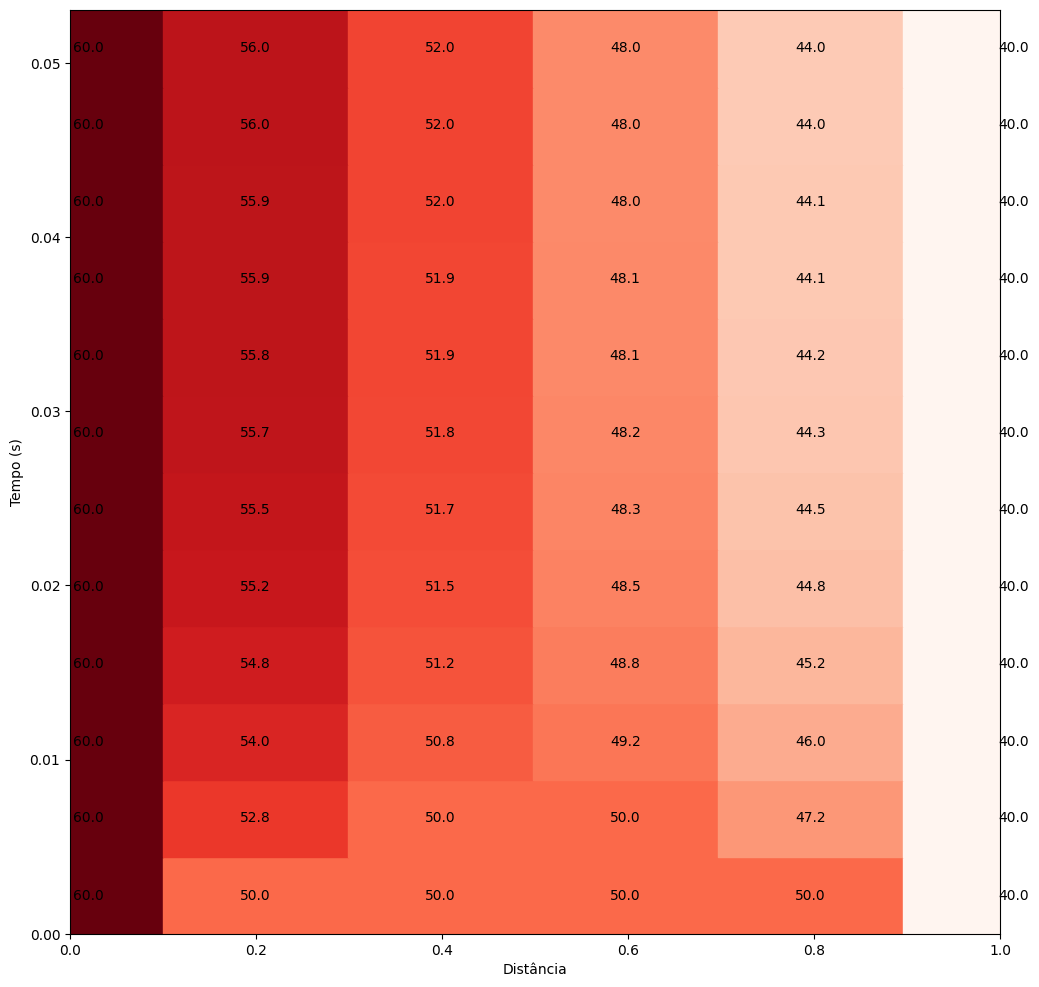

In [1434]:
plot_line(result_euler, step)
plot_grid(result_euler, step)

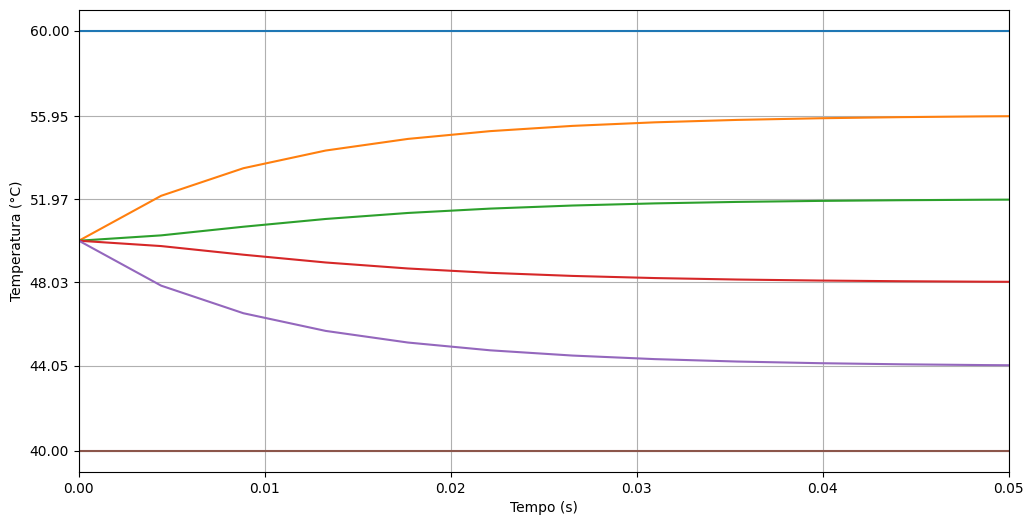

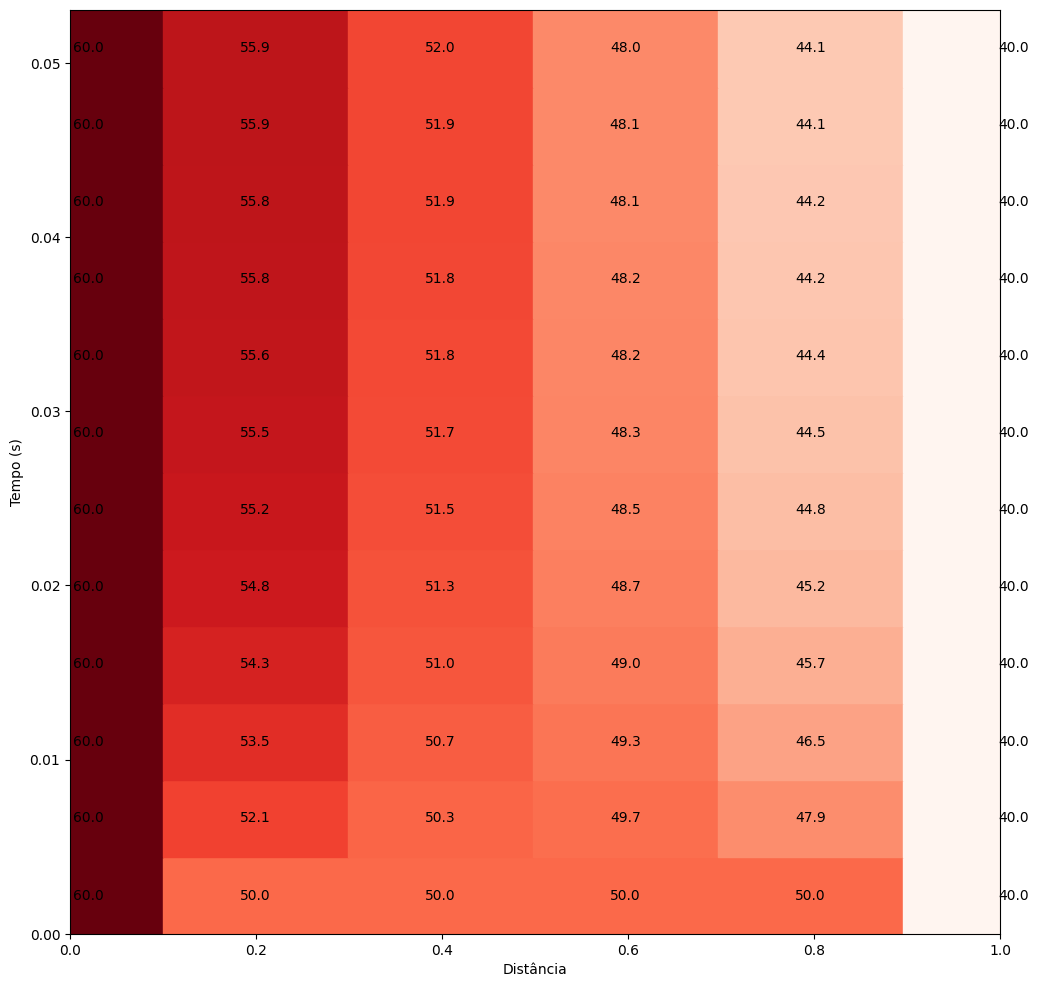

In [1435]:
plot_line(result_runge, step)
plot_grid(result_runge, step)

### Solução do sistema com os métodos de Euler e Runge Kutta e incremento em Tbegin

### Escolhendo o passo de tempo

In [1436]:
time_simulation = 2
step = time_simulation/100000

print("Passo de tempo escolhido:", step)

Passo de tempo escolhido: 2e-05


In [1437]:
result_euler_with_incr = solver_with_increment(np.full(N, t0, dtype=np.float64), time_simulation, step, euler_step, 10000)
result_runge_with_incr = solver_with_increment(np.full(N, t0, dtype=np.float64), time_simulation, step, runge_kutta_step, 10000)

result_euler_with_incr = np.concatenate([np.full((1, result_euler_with_incr.shape[1]), 60), result_euler_with_incr, np.full((1, result_euler_with_incr.shape[1]), 40)], axis=0)
result_runge_with_incr = np.concatenate([np.full((1, result_runge_with_incr.shape[1]), 60), result_runge_with_incr, np.full((1, result_runge_with_incr.shape[1]), 40)], axis=0)


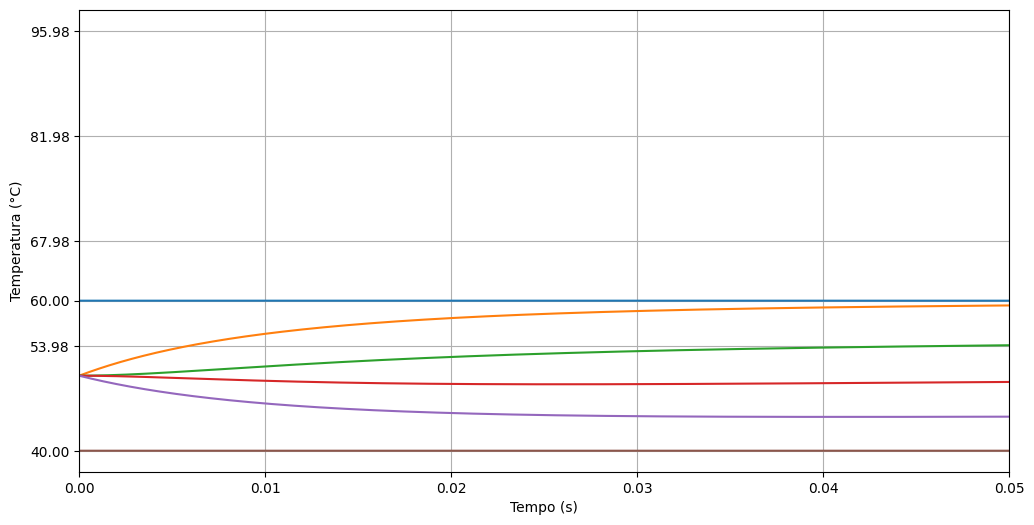

In [1438]:
plot_line(result_euler_with_incr, step, False)
#plot_grid(result_euler_with_incr, step)

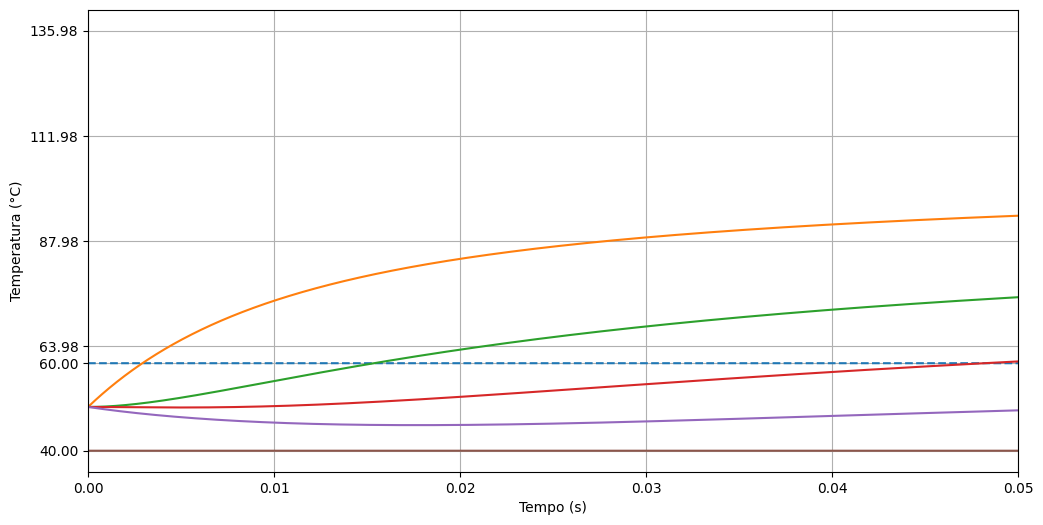

In [1439]:
plot_line(result_runge_with_incr, step, True)
#plot_grid(result_runge_with_incr, step)